In [27]:
import pandas as pd
f1="Meta-Llama-3-8B-Instruct_disease_eval_summary.txt"
f2="Llama3-8B-Instruct_CanLit_LR_2-4_FT_0.01_model_name_eval_summary.txt"
f3="Llama3-8B-Instruct_CanLit_LR_2-4_FT_0.1_model_name_eval_summary.txt"
f4="Llama3-8B-Instruct_CanLit_LR_2-4_FT_0.5_model_name_eval_summary.txt"
f5="Llama3-8B-Instruct_CanLit_LR_2-4_FT_1.0_model_name_eval_summary.txt"

files = [f1, f2, f3, f4, f5 ]

array=[]
for n in files:

    df1 = pd.read_csv(n, sep="\s+", header=None)
    df1 = df1.drop([0,2,3,4,5], axis=1)
    df1['perc correct'] = df1[1]/df1[6]
    df1['perc answered'] = df1[6]/1921

    # print("{:4f} {:4f} {:4f} {:4f} {}".format(
    print("{:4f} {:4f} {:4f} {:4f}".format(
        df1['perc correct'].mean(),
        df1['perc correct'].std(),
        df1['perc answered'].mean(),
        df1['perc answered'].std(),
        df1['perc correct'].count(),)
    )

    array.append([
        df1['perc correct'].mean(),
        #df1['perc correct'].std(),
        df1['perc answered'].mean(),
        #df1['perc answered'].std(),
        #df1['perc correct'].count(),
    ])
    

0.605039 0.006848 0.999844 0.000251
0.553350 0.013472 0.983186 0.002666
0.592627 0.008667 0.638947 0.010704
0.552639 0.009769 0.896408 0.008205
0.531418 0.009392 0.698022 0.004488


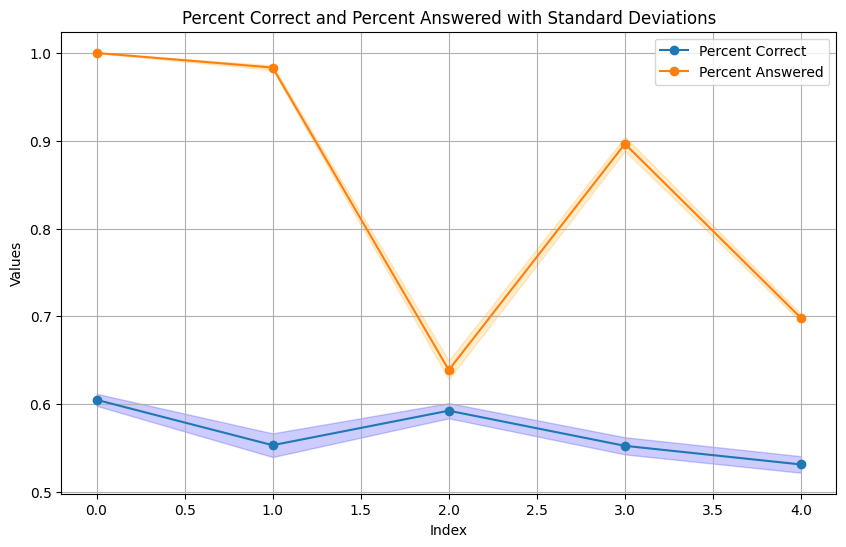

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    "Percent Correct": [0.605039, 0.553350, 0.592627, 0.552639, 0.531418],
    "Std Dev of Percent Correct": [0.006848, 0.013472, 0.008667, 0.009769, 0.009392],
    "Percent Answered": [0.999844, 0.983186, 0.638947, 0.896408, 0.698022],
    "Std Dev of Percent Answered": [0.000251, 0.002666, 0.010704, 0.008205, 0.004488],
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))

# Plot Percent Correct and its Std Dev
plt.plot(df.index, df["Percent Correct"], marker='o', label="Percent Correct")
plt.fill_between(df.index, 
                 df["Percent Correct"] - df["Std Dev of Percent Correct"], 
                 df["Percent Correct"] + df["Std Dev of Percent Correct"], 
                 color='blue', alpha=0.2)

# Plot Percent Answered and its Std Dev
plt.plot(df.index, df["Percent Answered"], marker='o', label="Percent Answered")
plt.fill_between(df.index, 
                 df["Percent Answered"] - df["Std Dev of Percent Answered"], 
                 df["Percent Answered"] + df["Std Dev of Percent Answered"], 
                 color='orange', alpha=0.2)

# Labels and Title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Percent Correct and Percent Answered with Standard Deviations')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

